In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle

import xmeos
from xmeos import models
from xmeos import datamod

CONSTS = models.CONSTS

In [2]:
analysis_file = 'data/analysis.pkl'
with open(analysis_file, 'rb') as f:
    analysis = pickle.load(f)

In [3]:
eos_mod = analysis['eos_mod']
data = analysis['datasets']['Spera2011']
eos_electronic = analysis['eos_electronic']
# data = analysis['datasets']['multi']

param_tex_str = analysis['param_tex_str']
params_init = analysis['params_init']

eos_mod.set_params(params_init)
# display(eos_mod.get_params())
datamodel = datamod.init_datamodel(data, eos_mod)


In [4]:
# datamodel

In [5]:
print('Calc Params')
print('===========')
eos_mod.get_calc_params()

Calc Params


{'bcoef': ['_bcoef_0', '_bcoef_1', '_bcoef_2', '_bcoef_3', '_bcoef_4', 'V0'],
 'compress': ['V0', 'K0', 'KP0'],
 'electronic': ['V0', 'CvelFac0', 'CvelFacExp', 'Tel0', 'TelExp'],
 'gamma': ['V0', 'gamma0', 'gammap0'],
 'refstate': ['V0', 'S0', 'E0'],
 'thermal': ['mexp', 'Cvlimfac']}

In [6]:
fit_calcs = ['compress','refstate','gamma','bcoef','thermal']
fix_params = ['S0','Cvlimfac','mexp']
# fix_params = ['S0','mexp']
# fix_params = ['S0','Cvlimfac']
datamodel['eos_mod'].set_param_values([3/5,1], param_names=['mexp','Cvlimfac'])
datamod.select_fit_params(datamodel, fit_calcs, fix_params=fix_params)

In [7]:
datamod.fit(datamodel)
datamod.fit(datamodel, apply_bulk_mod_wt=True, wt_vol=.5)

In [8]:
R2fit = datamodel['posterior']['R2fit']
display('R2fit = ', R2fit)
display('R2avg = ', 0.5*R2fit['E']+.25*R2fit['P']+.25*R2fit['E'])
display('Model Residual Error = ', datamodel['posterior']['fit_err'])
display(datamodel['posterior']['param_tbl'])

'R2fit = '

{'E': 0.999764704810403, 'P': 0.9998527462848238, 'V': 0.9986048484573232}

'R2avg = '

0.9997867151790083

'Model Residual Error = '

{'E': 0.005822274768633295, 'P': 0.6264773607275599, 'V': 0.10136161286159279}

,name,value,error
0,V0,12.949251,0.017640
1,K0,13.200066,0.193723
2,KP0,8.238368,0.048639
3,E0,-20.595341,0.001899
4,gamma0,0.189943,0.005303
5,gammap0,-1.940242,0.034831
6,_bcoef_0,0.982133,0.009691
7,_bcoef_1,0.614990,0.059765
8,_bcoef_2,1.310495,0.272604
9,_bcoef_3,-3.040062,1.735563


In [9]:
display('R2fit = ', datamodel['posterior']['R2fit'])
display('Model Residual Error = ', datamodel['posterior']['fit_err'])
display(datamodel['posterior']['param_tbl'])

'R2fit = '

{'E': 0.999764704810403, 'P': 0.9998527462848238, 'V': 0.9986048484573232}

'Model Residual Error = '

{'E': 0.005822274768633295, 'P': 0.6264773607275599, 'V': 0.10136161286159279}

,name,value,error
0,V0,12.949251,0.017640
1,K0,13.200066,0.193723
2,KP0,8.238368,0.048639
3,E0,-20.595341,0.001899
4,gamma0,0.189943,0.005303
5,gammap0,-1.940242,0.034831
6,_bcoef_0,0.982133,0.009691
7,_bcoef_1,0.614990,0.059765
8,_bcoef_2,1.310495,0.272604
9,_bcoef_3,-3.040062,1.735563


In [10]:
.5*(0.9997647071840597+.5*0.9998527429587041+.5*0.9986048490791933)

0.9994967516015042

In [11]:
.5*(0.999759019439001+.5*0.99985949101627+.5*0.9986848263745852)

0.9995155890672143

In [12]:
.999516-.999497

1.8999999999991246e-05

In [13]:
# Save fitted model
analysis['datamodel'] = datamodel
with open(analysis_file, 'wb') as f:
    pickle.dump(analysis, f)

<IPython.core.display.Javascript object>


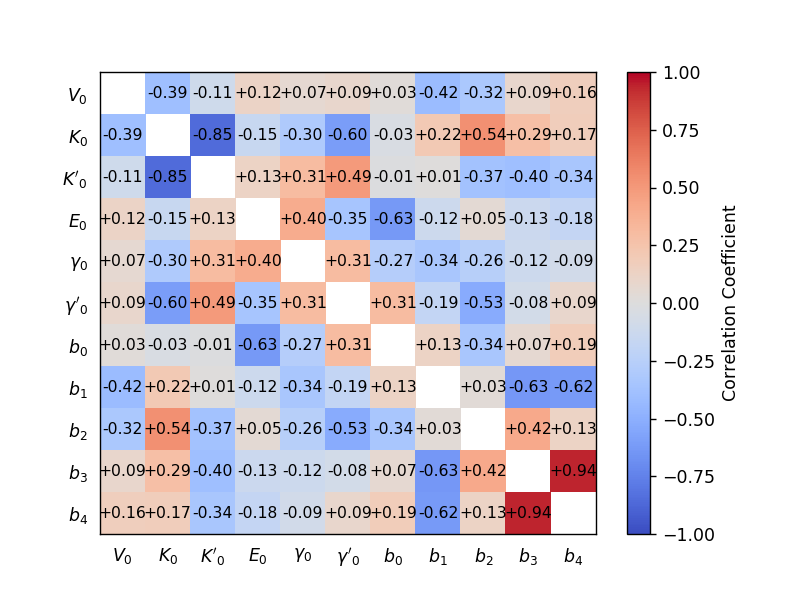

In [14]:
plt.figure()

posterior = datamodel['posterior']
corr = posterior['corr']
if corr is not None:

    param_labels = [param_tex_str[name] for name in posterior['param_names']]


    cmap = plt.get_cmap('coolwarm')
    Nparam = len(param_labels)

    corr_plt = np.flipud(np.ma.masked_where(np.eye(Nparam),corr))
    plt.pcolormesh(corr_plt,cmap=cmap)


    # plt.imshow(corr, cmap=cmap)
    plt.clim(-1,1)
    plt.colorbar(label=r'Correlation Coefficient')

    plt.xticks(.5+np.arange(len(param_labels)),param_labels)
    plt.yticks(np.flipud(.5+np.arange(len(param_labels))),param_labels)

    for (index,val) in np.ndenumerate(np.flipud(corr)):
        if index[1]!=Nparam-1-index[0]:
            plt.text(index[1]+.5,index[0]+.5,'%+.2f'%(val),fontsize=9,
                     horizontalalignment='center', verticalalignment='center')

    plt.setp(plt.gca().get_xticklines(),visible=False);
    plt.setp(plt.gca().get_yticklines(),visible=False);


#plt.plot((0,11),(5,5),'k-',linewidth=2)
#plt.plot((0,11),(7,7),'k-',linewidth=2)
#plt.plot((4,4),(0,11),'k-',linewidth=2)
#plt.plot((6,6),(0,11),'k-',linewidth=2)
#plt.show()



In [15]:
eos_mod = datamodel['eos_mod']
T0 = eos_mod.get_refstate()['T0']
V0 = eos_mod.get_params()['V0']
tbl = datamodel['data']['table']
Tlbl = data['T_labels']
delT = Tlbl[1]-Tlbl[0]

cmap = plt.get_cmap('coolwarm',len(Tlbl))
clims = [Tlbl[0]-delT/2,Tlbl[-1]+delT/2]

Vmod = V0*np.linspace(.3,1.2,1001)

<IPython.core.display.Javascript object>


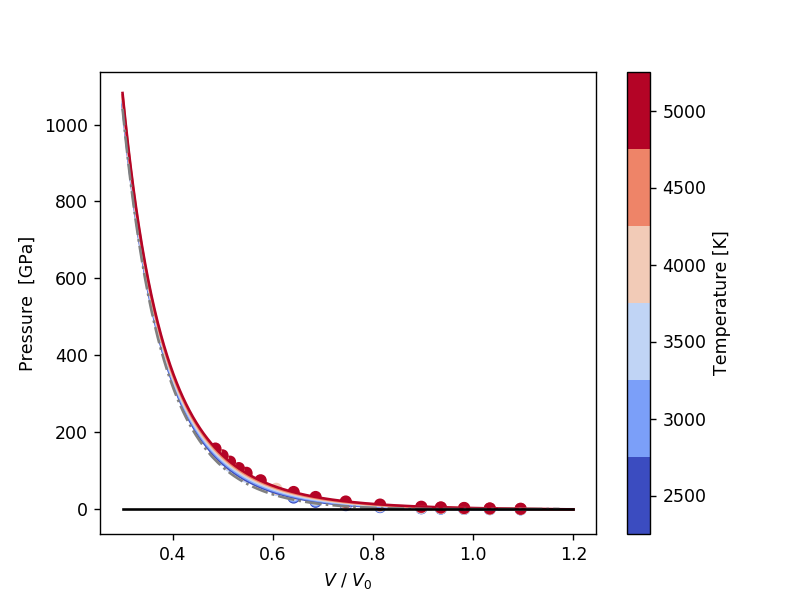

In [16]:
plt.figure()
for iT in data['T_avg']:
    icol = cmap((iT-clims[0])/(clims[1]-clims[0]))
    plt.plot(Vmod/V0, eos_mod.press(Vmod,iT), '-', color=icol)


Tbnd = 1773
Tbnd = 1673
Pbnd = eos_mod.press(Vmod,Tbnd)
# indbnd = np.argmin(Pbnd)
indbnd = np.argmin(Pbnd**2)


plt.plot(Vmod[:indbnd]/V0, Pbnd[:indbnd],'-.',color=[.5,.5,.5])
    
plt.scatter(tbl['V']/V0,tbl['P'],c=tbl['T'], cmap=cmap)
plt.clim(clims)
plt.xlabel(r'$V$ / $V_0$')
plt.ylabel(r'Pressure  [GPa]')
cbar = plt.colorbar(label='Temperature [K]')
cbar.set_ticks(Tlbl)

#plt.ylim(-2,15);
plt.plot(Vmod/V0,0*Vmod,'k-')




<IPython.core.display.Javascript object>


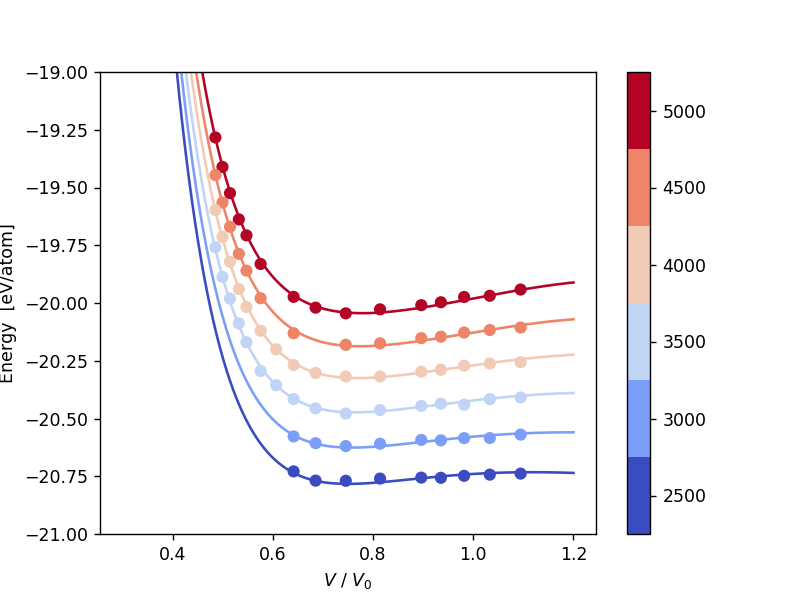

(-21, -19)

In [17]:
plt.figure()
for iT in data['T_avg']:
    icol = cmap((iT-clims[0])/(clims[1]-clims[0]))
    plt.plot(Vmod/V0, eos_mod.internal_energy(Vmod,iT), '-', color=icol)
    
plt.scatter(tbl['V']/V0,tbl['E'],c=tbl['T'], cmap=cmap)
plt.xlabel(r'$V$ / $V_0$')
plt.ylabel(r'Energy  [eV/atom]')
cbar = plt.colorbar()
plt.clim(clims)
cbar.set_ticks(Tlbl)
plt.ylim(-21,-19)

<IPython.core.display.Javascript object>


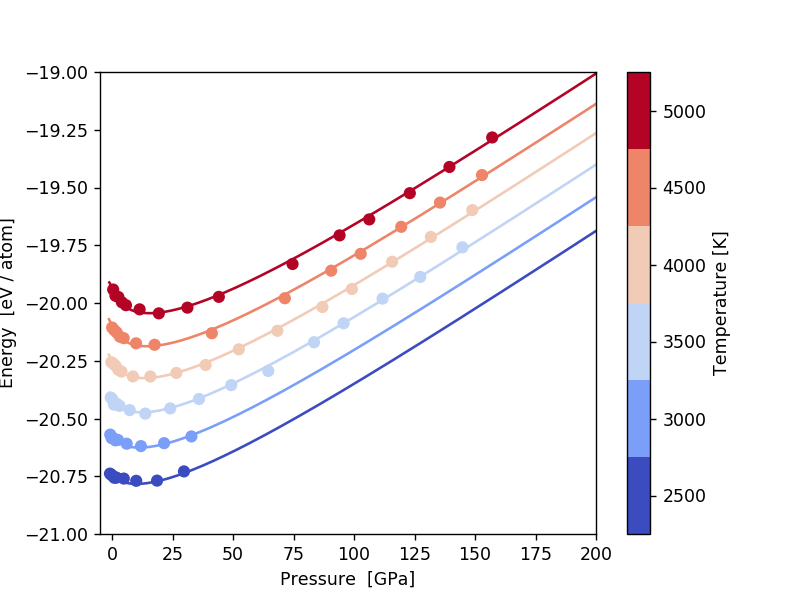

(-21, -19)

In [18]:
plt.figure()
for iT in data['T_avg']:
    icol = cmap((iT-clims[0])/(clims[1]-clims[0]))
    plt.plot(eos_mod.press(Vmod,iT), eos_mod.internal_energy(Vmod,iT), '-', color=icol)
    
plt.scatter(tbl['P'], tbl['E'], c=tbl['T'], cmap=cmap)
plt.clim(clims)
plt.xlabel(r'Pressure  [GPa]')
plt.ylabel(r'Energy  [eV / atom]')
cbar = plt.colorbar(label='Temperature [K]')
cbar.set_ticks(Tlbl)

plt.xlim(-5, 200)
plt.ylim(-21, -19)

In [19]:
eos_electronic.set_param_values(param_names='V0', param_values=V0)
E_elec = eos_electronic.energy(tbl['V'], tbl['T'])
P_elec = eos_electronic.press(tbl['V'], tbl['T'])

In [20]:
T_avg = data['T_avg']
# T_avg.append(8000)

<IPython.core.display.Javascript object>


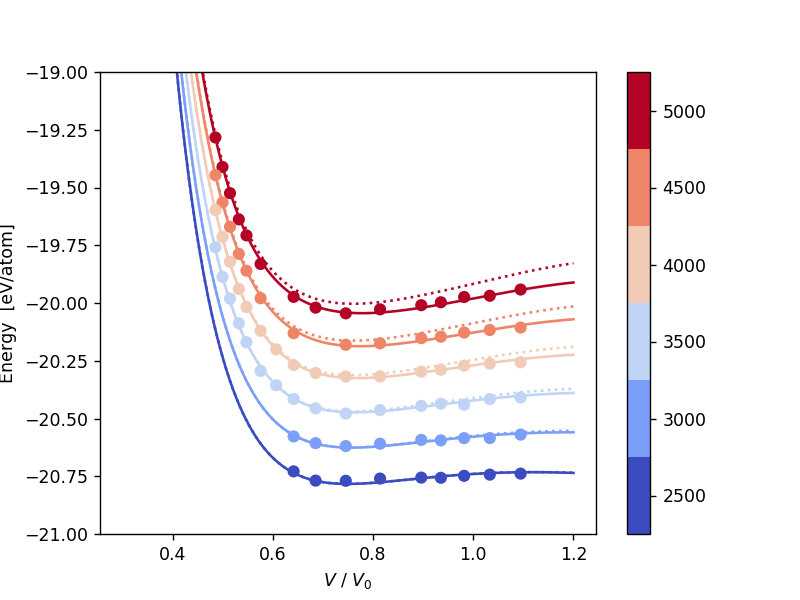

(-21, -19)

In [21]:
plt.figure()
for iT in T_avg:
    icol = cmap((iT-clims[0])/(clims[1]-clims[0]))
    plt.plot(Vmod/V0, eos_mod.internal_energy(Vmod,iT), '-', color=icol)
    plt.plot(Vmod/V0, eos_mod.internal_energy(Vmod,iT)+eos_electronic.energy(Vmod, iT), ':', color=icol)
    
plt.scatter(tbl['V']/V0,tbl['E'],c=tbl['T'], cmap=cmap)
plt.xlabel(r'$V$ / $V_0$')
plt.ylabel(r'Energy  [eV/atom]')
cbar = plt.colorbar()
plt.clim(clims)
cbar.set_ticks(Tlbl)
plt.ylim(-21,-19)

<IPython.core.display.Javascript object>


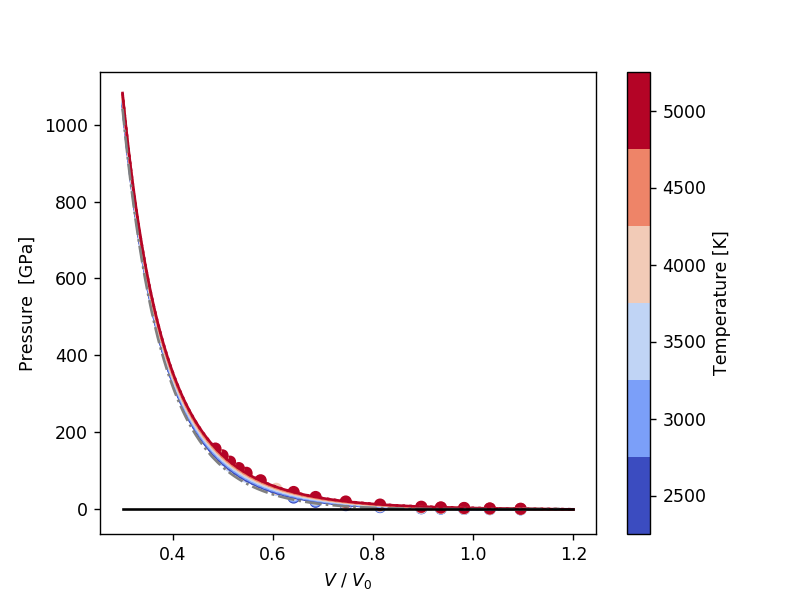

In [22]:
plt.figure()
for iT in data['T_avg']:
    icol = cmap((iT-clims[0])/(clims[1]-clims[0]))
    plt.plot(Vmod/V0, eos_mod.press(Vmod,iT), '-', color=icol)
    plt.plot(Vmod/V0, eos_mod.press(Vmod,iT)+eos_electronic.press(Vmod, iT), ':', color=icol)


Tbnd = 1773
Tbnd = 1673
Pbnd = eos_mod.press(Vmod,Tbnd)
# indbnd = np.argmin(Pbnd)
indbnd = np.argmin(Pbnd**2)


plt.plot(Vmod[:indbnd]/V0, Pbnd[:indbnd],'-.',color=[.5,.5,.5])
    
plt.scatter(tbl['V']/V0,tbl['P'],c=tbl['T'], cmap=cmap)
plt.clim(clims)
plt.xlabel(r'$V$ / $V_0$')
plt.ylabel(r'Pressure  [GPa]')
cbar = plt.colorbar(label='Temperature [K]')
cbar.set_ticks(Tlbl)

#plt.ylim(-2,15);
plt.plot(Vmod/V0,0*Vmod,'k-')

In [19]:
.91*12.95

11.7845